In [107]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

In [108]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [109]:
study_results.head(1)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0


## summary combined table

In [110]:
# combine datasets
combo = pd.merge(mouse_metadata, study_results, how="left", on = "Mouse ID")
combo.tail(1)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1892,z969,Naftisol,Male,9,30,45,73.867845,4


In [163]:
combo.columns = ['Mouse ID','Drug Regimen','Sex','Age_months','Weight','Timepoint','Tumor_Volume','Metastatic Sites']
combo.head(3)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight,Timepoint,Tumor_Volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1


In [112]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen



In [113]:
tumor_median = combo.groupby('Drug Regimen').Tumor_Volume.median()
tumor_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor_Volume, dtype: float64

In [114]:
tumor_var = combo.groupby('Drug Regimen').Tumor_Volume.var()
tumor_var

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor_Volume, dtype: float64

In [115]:
tumor_sd = combo.groupby('Drug Regimen').Tumor_Volume.std()
tumor_sd

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.507770
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor_Volume, dtype: float64

## Summarry Statistics

In [116]:
####### ADD SEM column
# turn groupby object into df

sum_stats = pd.DataFrame({"Mean of Tumor Size":tumor_mean, "Median of Tumor Size":tumor_median,
                          "Variance of Tumor Size": tumor_var, "SD": tumor_sd})
sum_stats

NameError: name 'tumor_mean' is not defined

In [ ]:
# figure out what plotting question wants
df = combo.groupby("Drug Regimen").count()
df

## fix

In [ ]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
#pyplot
######FIX INDEX< LABEL

x_axis = np.arange(len(df))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(10, 3))
plt.bar(x_axis, df["Mouse ID"], color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, df["Mouse ID"], rotation="vertical")

In [ ]:
# USING PANDAS method to plot, not pyplot
# plot Pandas
# reduce df to just columns to be plotted

df_plot = combo[["Drug Regimen","Mouse ID"]]

# Set the index to be "State" so they will be used as labels
df_plot = df_plot.set_index("Drug Regimen")

# create groupby object to find number of data points for each treatment

df_plot = df_plot.groupby("Drug Regimen")["Mouse ID"].count()
df_plot



In [ ]:
# turn that groupby series into a dataframe to plot
df_plot = pd.DataFrame({"Drug Treatments":df_plot})
df_plot

In [ ]:
# Use DataFrame.plot() in order to create a bar chart of the data
df_plot.plot(kind="bar", figsize=(10,3))

# Set a title for the chart
plt.title("Drug Treatments")

plt.show()
plt.tight_layout()

## Fix

In [ ]:
#Generate a # pie plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` 
#that shows the distribution of female or male mice in the study.
pie = combo[["Mouse ID","Sex"]]
pie

# set index to sex so that M/F will show as labels
pie = pie.set_index("Sex")
pie

#creat groupby object to find distribution of male and female
pie = pie.groupby("Sex")["Mouse ID"].count()
pie

# turn series created by above group by back to a datafram ready to plot
pie = pd.DataFrame({"Mouse Gender":pie})
pie

In [ ]:
# show Panda DataFrame Plot ###FIX LABELS###
plot = pie.plot.pie(y="Mouse Gender")
plot

In [ ]:
# now make same chart using pyplot ###SAME FIXES HERE, A START
plt.pie(pie)

In [ ]:
# Calculate the final tumor volume of each mouse across four of the 
#most promising treatment regimens. 
#Calculate the IQR and quantitatively determine 
#if there are any potential outliers.

# find the best four treatments based on mean of tumor volume size

In [168]:
# find unqiue mice
mice = combo.groupby("Drug Regimen")["Mouse ID"].count()


mice



times = combo.groupby(["Drug Regimen","Mouse ID"])["Timepoint","Tumor_Volume"].max()
times.head()

#times = combo.groupby(["Mouse ID","Drug Regimen"])["Timepoint",].max()
#times.head(20)






Timepoint  Tumor_Volume
Drug Regimen Mouse ID                         
Capomulin    b128             45     45.651331
             b742             45     45.000000
             f966             20     45.000000
             g288             45     46.304003
             g316             45     46.809225

In [ ]:
# reduce df to only show threatments that occurerd at the final time point of 45

final = combo.loc[(combo['Timepoint'] == 45)]
final

## Ramican results, sum stats and box plot.

In [170]:
Ramicane = final.loc[(final["Drug Regimen"] == "Ramicane")]
                  
Ramicane.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight,Timepoint,Tumor_Volume,Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
59,s508,Ramicane,Male,1,17,45,30.276232,0
74,m546,Ramicane,Male,18,16,45,30.564625,1
84,z578,Ramicane,Male,11,16,45,30.638696,0


In [ ]:
#find quartlies of final tumor volume in Ramican treatment

quartiles = Ramicane['Tumor_Volume'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Final Tumor Volume in Ramicane treatment is: {lowerq}")
print(f"The upper quartile of FTV is: {upperq}")
print(f"The interquartile range of FTV is: {iqr}")
print(f"The the median of FTV is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

## boxplot for Ramicine

In [ ]:
boxplot = Ramicane.boxplot(column=['Tumor_Volume'])


# DatFrame for just Capomulin resulst for last tumor volume, sum stats, and box plot.

In [ ]:
# find results for just Capomulin
Capomulin = final.loc[(final['Drug Regimen'] == "Capomulin")]
Capomulin.head(1)


In [ ]:
#find quartlies of final tumor volume in Capomulin treatment

quartiles = Capomulin['Tumor_Volume'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Final Tumor Volume in Capomulin treatment is: {lowerq}")
print(f"The upper quartile of FTV is: {upperq}")
print(f"The interquartile range of FTV is: {iqr}")
print(f"The the median of FTV is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

In [ ]:
boxplot = Capomulin.boxplot(column=['Tumor_Volume'])

In [ ]:
boxplot = Capomulin.boxplot(column=['Tumor_Volume'])

In [ ]:
RC = pd.merge(Capo_Reduced,Ram_Reduced, how= "outer", on = "Timepoint")
RC

RC.columns=["Capomulin","Timepoint","Capomulin Final","Ramicane","Ramicane Final"]
RC

# DataFrame for just Infubinol results for last tumor volume, sum stats, and box plot.

In [ ]:
Infubinol = final.loc[(final['Drug Regimen'] == "Infubinol")]
Infubinol.head()

#Infu_Reduced = Infubinol.drop(columns = ["Mouse ID","Sex","Age_months","Weight","Metastatic Sites"])
#Infu_Reduced.head(1)

In [ ]:
quartiles = Infubinol['Tumor_Volume'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Final Tumor Volume in Infubinol treatment is: {lowerq}")
print(f"The upper quartile of FTV is: {upperq}")
print(f"The interquartile range of FTV is: {iqr}")
print(f"The the median of FTV is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

In [ ]:
boxplot = Infubinol.boxplot(column=['Tumor_Volume'])

# Just Ceftamin

In [ ]:
Ceftamin = final.loc[(final['Drug Regimen'] == "Ceftamin")]
Ceftamin.head()

#Ceftamin_Reduced = Ceftamin.drop(columns = ["Mouse ID","Sex","Age_months","Weight","Metastatic Sites"])
#Ceftamin_Reduced

In [ ]:
quartiles = Ceftamin['Tumor_Volume'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Final Tumor Volume in Ceftamin treatment is: {lowerq}")
print(f"The upper quartile of FTV is: {upperq}")
print(f"The interquartile range of FTV is: {iqr}")
print(f"The the median of FTV is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

In [ ]:
boxplot = Ceftamin.boxplot(column=['Tumor_Volume'])

In [ ]:
# merge datasets
#CI = pd.merge(Ceftamin_Reduced, Infu_Reduced, how="outer", on="Timepoint")
#CI

#CI.columns = ["Ceftamin","Timepoint","Ceftamin Final", "Infubinol","Infubinol Final"]
#CI.head()

## Summary BOX PLOTS on four nest treatments

Text(0.5, 1.0, 'Ceftamin')

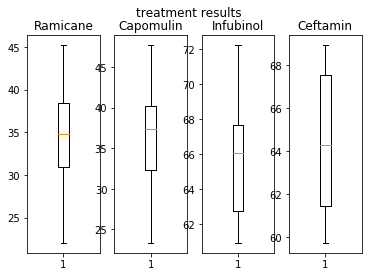

In [128]:
fig, ax = plt.subplots(1, 4)

fig.suptitle("treatment results")
ax[0].boxplot(Ramicane["Tumor_Volume"])
ax[0].set_title("Ramicane")
ax[1].boxplot(Capomulin["Tumor_Volume"])
ax[1].set_title("Capomulin")
ax[2].boxplot(Infubinol["Tumor_Volume"])
ax[2].set_title("Infubinol")
ax[3].boxplot(Ceftamin["Tumor_Volume"])
ax[3].set_title("Ceftamin")


## make df just for Cap treatment

In [175]:
 #Generate a line plot of time point versus tumor volume for a single mouse treated with Capomulin.

 #Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.

 #Calculate the correlation coefficient and linear regression model between mouse weig


Cap_Treatment = combo.loc[(combo["Drug Regimen"] =="Capomulin")]

#df_four_five = df_only_calc.loc[(df["ntrp_play_level"]== 4.5)]
Cap_Treatment.head(3)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight,Timepoint,Tumor_Volume,Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0


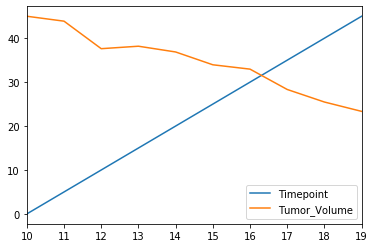

In [187]:

single_mouse = Cap_Treatment.loc[(Cap_Treatment["Mouse ID"]== "s185")]

test = single_mouse.drop(columns=["Sex","Age_months","Weight","Metastatic Sites"])

test

#reduced_df = full_df.drop(columns=[

#single_mouse
#>>> s = pd.Series([1, 3, 2])
#>>> s.plot.line()

test.plot.line()


In [ ]:
boxplot